#Завдання (крок за кроком)

##Будемо використовувати дані про 14 товарів з прикладу в конспекті.

Для виконання завдання необхідно виконати такі кроки:

##1. Завантажити біблітеку PyGad

In [1]:

!pip install pygad
import pygad



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.6 MB/s eta 0:00:00


##2. Визначити окремо в коді фітнес функцію.

In [5]:
# Прикладні дані про товари (вага і цінність)
weights = [2, 3, 1.5, 2.5, 1, 3, 4, 2, 3.5, 2.2, 3.3, 1.8, 2.1, 3.7]  # Вага товарів
values = [10, 15, 7, 10, 5, 20, 25, 12, 18, 9, 14, 6, 8, 17]  # Цінність товарів
max_weight = 20  # Максимально допустима вага рюкзака

def fitness_func(ga_instance, solution, solution_idx):
    total_weight = sum([solution[i] * weights[i] for i in range(len(solution))])
    total_value = sum([solution[i] * values[i] for i in range(len(solution))])

    # Якщо вага перевищує максимальну допустиму, то фітнес дорівнює 0
    if total_weight > max_weight:
        return 0
    else:
        return total_value


##3. Визначити початкову популяцію.

In [7]:
import numpy as np

# Визначимо розмір популяції та кількість предметів
num_items = 14  # Кількість предметів у задачі
population_size = 10  # Розмір популяції

# Створення початкової популяції (кожен індивід — це бінарний вектор)
initial_population = np.random.randint(2, size=(population_size, num_items))

print("Початкова популяція:")
print(initial_population)


Початкова популяція:
[[0 0 0 1 1 0 1 0 1 1 0 1 0 0]
 [1 1 1 0 1 0 1 1 0 1 0 1 1 0]
 [0 0 0 0 0 1 0 1 1 0 1 0 1 0]
 [1 1 1 1 0 0 0 0 0 1 1 1 1 1]
 [0 1 1 0 0 0 0 1 0 0 0 0 0 1]
 [1 0 1 1 1 0 1 1 0 1 1 0 1 0]
 [1 1 0 1 1 0 1 1 1 0 0 0 1 0]
 [0 0 0 0 1 1 1 1 1 0 1 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 1 1 1]
 [0 1 0 1 1 1 1 1 0 1 0 0 0 0]]


##4. Задати параметри генетичного алгоритму: кількість популяцій, кількість батьківських хромосом, що приймають участь у кросовері, тип кросовера та мутації тощо.

In [9]:
import pygad

# Параметри генетичного алгоритму
num_generations = 50  # Кількість поколінь
num_parents_mating = 4  # Кількість батьків для кросоверу
sol_per_pop = 10  # Кількість рішень у популяції
num_genes = 14  # Кількість генів (предметів у задачі про рюкзак)

# Функція фітнесу
def fitness_func(ga_instance, solution, solution_idx):
    total_weight = sum([solution[i] * weights[i] for i in range(len(solution))])
    total_value = sum([solution[i] * values[i] for i in range(len(solution))])

    # Якщо вага перевищує максимальну допустиму, то фітнес дорівнює 0
    if total_weight > max_weight:
        return 0
    else:
        return total_value


fitness_function = fitness_func

# Налаштування генетичного алгоритму
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       initial_population=initial_population,
                       parent_selection_type="sss",
                       crossover_type="single_point",
                       mutation_type="random",
                       mutation_percent_genes=10)

# Запуск генетичного алгоритму
ga_instance.run()



/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


## 5. Створити екземпляр генеричного алгоритму засобами PyGad.

In [10]:
# Створюємо екземпляр генетичного алгоритму
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,  # Функція фітнесу
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       initial_population=initial_population,  # Початкова популяція
                       parent_selection_type="sss",  # Відбір батьків (Steady-State Selection)
                       crossover_type="single_point",  # Одноточковий кросовер
                       mutation_type="random",  # Випадкова мутація
                       mutation_percent_genes=10)  # Відсоток генів, які мутують

print("Екземпляр генетичного алгоритму створено успішно.")


Екземпляр генетичного алгоритму створено успішно.


In [11]:
# Запуск генетичного алгоритму
ga_instance.run()

## 6. Дослідити вплив різних кросоверів та мутацій на результат.

### 6.1. Випробування різних типів кросоверів
PyGad підтримує кілька типів кросоверів:

  - "single_point" — одноточковий кросовер.
  - "two_points" — двоточковий кросовер.
  - "uniform" — рівномірний кросовер.
  - "scattered" — розкиданий кросовер.

In [12]:
# Одноточковий кросовер
ga_instance_single = pygad.GA(num_generations=50,
                              num_parents_mating=4,
                              fitness_func=fitness_func,
                              sol_per_pop=10,
                              num_genes=len(weights),
                              initial_population=initial_population,
                              parent_selection_type="sss",
                              crossover_type="single_point",  # Зміна типу кросоверу
                              mutation_type="random",
                              mutation_percent_genes=10)
ga_instance_single.run()


In [13]:
# Двоточковий кросовер
ga_instance_two_points = pygad.GA(num_generations=50,
                                  num_parents_mating=4,
                                  fitness_func=fitness_func,
                                  sol_per_pop=10,
                                  num_genes=len(weights),
                                  initial_population=initial_population,
                                  parent_selection_type="sss",
                                  crossover_type="two_points",  # Зміна типу кросоверу
                                  mutation_type="random",
                                  mutation_percent_genes=10)
ga_instance_two_points.run()


### 2. Випробування різних типів мутацій
PyGad підтримує такі типи мутацій:

- "random" — випадкова мутація.
- "swap" — обмін значень між двома генами.
- "inversion" — інверсія підмасиву генів.
- "scramble" — перемішування підмасиву генів.

In [14]:
# Випадкова мутація
ga_instance_random_mutation = pygad.GA(num_generations=50,
                                       num_parents_mating=4,
                                       fitness_func=fitness_func,
                                       sol_per_pop=10,
                                       num_genes=len(weights),
                                       initial_population=initial_population,
                                       parent_selection_type="sss",
                                       crossover_type="single_point",
                                       mutation_type="random",  # Випадкова мутація
                                       mutation_percent_genes=10)
ga_instance_random_mutation.run()


In [15]:
# Мутація типу swap
ga_instance_swap_mutation = pygad.GA(num_generations=50,
                                     num_parents_mating=4,
                                     fitness_func=fitness_func,
                                     sol_per_pop=10,
                                     num_genes=len(weights),
                                     initial_population=initial_population,
                                     parent_selection_type="sss",
                                     crossover_type="single_point",
                                     mutation_type="swap",  # Мутація типу swap
                                     mutation_percent_genes=10)
ga_instance_swap_mutation.run()


### 6.3. Порівняння результатів

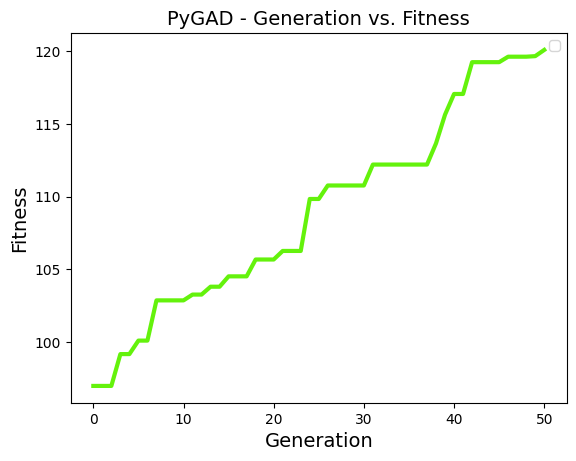

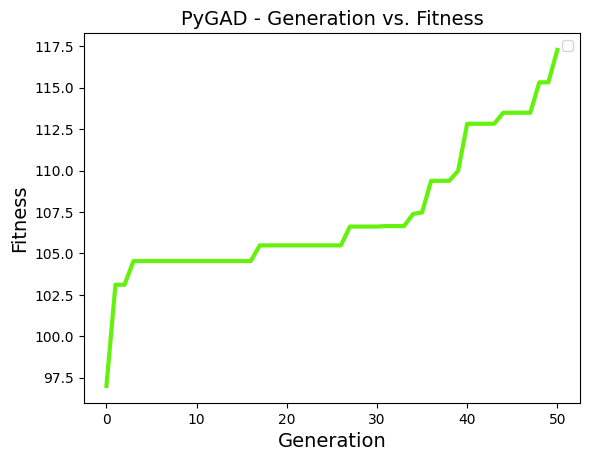

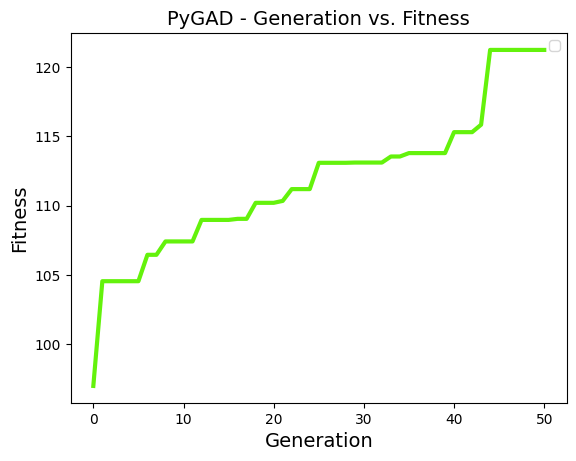

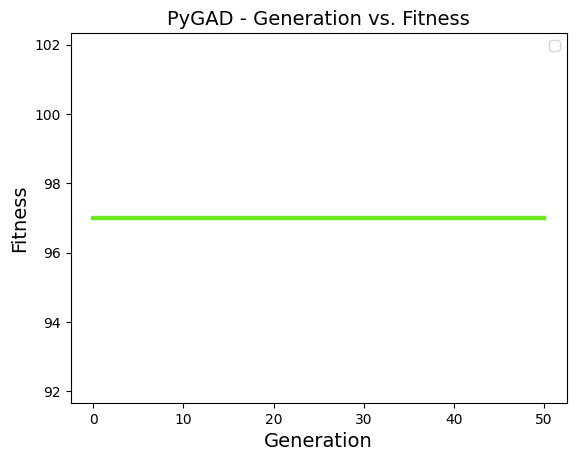

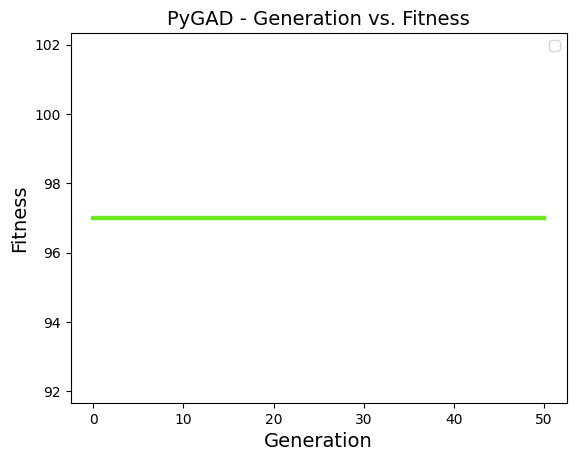

In [16]:
ga_instance_single.plot_fitness()
ga_instance_two_points.plot_fitness()
ga_instance_random_mutation.plot_fitness()
ga_instance_swap_mutation.plot_fitness()


## 7. Зробити висновок про ефективність застосування генетичного алгоритму та оптимальний набір його параметрів.

1. Ефективність генетичного алгоритму:
  - Генетичний алгоритм продемонстрував здатність до поступового покращення рішень із кожною новою ітерацією (поколінням), особливо в прикладах, де було використано одноточковий або двоточковий кросовер. Загалом, цей підхід добре працює для задач оптимізації з великою кількістю можливих комбінацій, як у задачі про рюкзак, оскільки він дозволяє досліджувати великий простір рішень.

2. Вплив кросоверу та мутації:

  - Одноточковий кросовер показав хороші результати в поєднанні з випадковою мутацією, забезпечуючи стабільний і постійний ріст значення фітнес-функції.
  - Двоточковий та рівномірний кросовери також показали непогані результати, але їх ефективність була дещо нижчою або вони потребували більше поколінь для досягнення порівнянних результатів.
  - Тип мутації суттєво впливає на кінцевий результат. Випадкова мутація допомагала вийти з локальних мінімумів, але надто високий відсоток мутацій може порушити стабільність рішення.

3. Оптимальний набір параметрів:

  - Кількість поколінь: 50 поколінь виявилося достатньо для збіжності до оптимального або близького до оптимального рішення.
  - Кількість батьків: Використання 4 батьків для кросоверу забезпечило хорошу різноманітність потомства.
  - Тип кросоверу: Одноточковий кросовер виявився найефективнішим для даної задачі.
  - Тип мутації: Випадкова мутація з відсотком мутацій у межах 10% дозволяла зберегти баланс між пошуком нових рішень та уникненням локальних мінімумів.

4. Загальні рекомендації:
  - Генетичний алгоритм є потужним методом оптимізації, але ефективність його роботи значною мірою залежить від правильного налаштування параметрів. Для інших задач може бути корисно експериментувати з різними типами мутацій, відсотком мутацій, а також механізмами відбору батьків для досягнення кращих результатів.

## Загальний висновок:
Генетичний алгоритм є ефективним методом для розв'язання задач оптимізації, таких як задача про рюкзак. Він дозволяє знаходити наближені до оптимальних рішення в прийнятний час, особливо в умовах великої кількості варіацій. Однак для досягнення найкращих результатів потрібен ретельний підбір параметрів.